In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [63]:
with open('../PYTHON/fred_api_key.txt') as r:
    fred_api_key = r.read()

from fredapi import Fred
fred_key = fred_api_key

# 1. Create the Fred object

In [60]:
fred = Fred(api_key=fred_key)
fred

- ## 1.1 Search using Fred

In [61]:
sp_search = fred.search('S&P', order_by='popularity')

In [62]:
sp_search.head(3)

id realtime_start realtime_end  \
series id                                                
BAMLH0A0HYM2  BAMLH0A0HYM2     2024-04-05   2024-04-05   
CSUSHPINSA      CSUSHPINSA     2024-04-05   2024-04-05   
SP500                SP500     2024-04-05   2024-04-05   

                                                          title  \
series id                                                         
BAMLH0A0HYM2  ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA    S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                   S&P 500   

             observation_start observation_end     frequency frequency_short  \
series id                                                                      
BAMLH0A0HYM2        1996-12-31      2024-04-04  Daily, Close               D   
CSUSHPINSA          1987-01-01      2024-01-01       Monthly               M   
SP500               2014-04-07      2024-04-04  Daily, Close               D   

                           units         units_short      seasonal_adjustment  \
series id                                                                       
BAMLH0A0HYM2             Percent                   %  Not Seasonally Adjusted   
CSUSHPINSA    Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
SP500                      Index               Index  Not Seasonally Adjusted   

             seasonal_adjustment_short               last_updated popularity  \
series id                                                                      
BAMLH0A0HYM2                       NSA  2024-04-05 08:39:07-05:00         92   
CSUSHPINSA                         NSA  2024-03-26 08:11:02-05:00         88   
SP500                              NSA  2024-04-04 19:10:57-05:00         83   

                                                          notes  
series id                                                        
BAMLH0A0HYM2  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA    For more information regarding the index, plea...  
SP500         The observations for the S&P 500 represent the...

- ## 1.2 Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series('SP500')

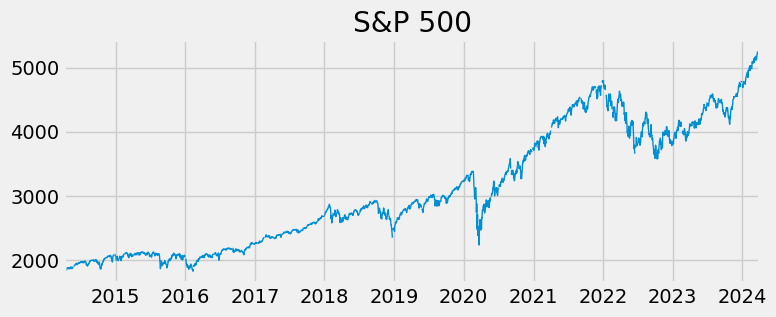

In [7]:
sp500.plot(figsize=(8,3),
           title='S&P 500',
           lw=1);

- ### 1.2.1 Pull and Join Multuple Data Series

In [8]:
unemp_search = fred.search('unemployment')

In [9]:
unemp_search.head(3)

id realtime_start realtime_end               title  \
series id                                                              
UNRATE        UNRATE     2024-04-05   2024-04-05   Unemployment Rate   
UNRATENSA  UNRATENSA     2024-04-05   2024-04-05   Unemployment Rate   
UNEMPLOY    UNEMPLOY     2024-04-05   2024-04-05  Unemployment Level   

          observation_start observation_end frequency frequency_short  \
series id                                                               
UNRATE           1948-01-01      2024-03-01   Monthly               M   
UNRATENSA        1948-01-01      2024-03-01   Monthly               M   
UNEMPLOY         1948-01-01      2024-03-01   Monthly               M   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2024-04-05 07:50:02-05:00         95   
UNRATENSA                       NSA  2024-04-05 07:50:24-05:00         58   
UNEMPLOY                         SA  2024-04-05 07:50:18-05:00         71   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
UNEMPLOY   The series comes from the 'Current Population ...

In [10]:
unrate = fred.get_series('unrate')

In [11]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Length: 915, dtype: float64

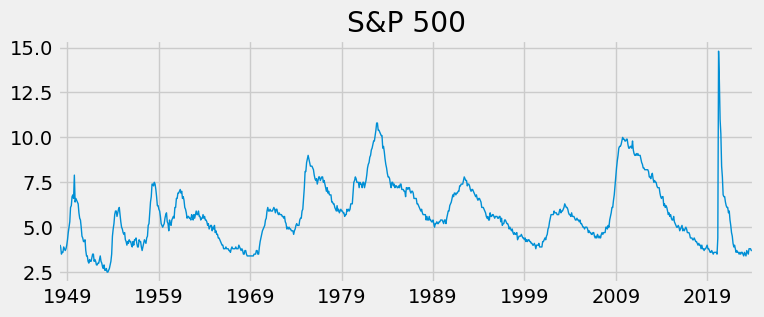

In [12]:
unrate.plot(figsize=(8,3),
           title='S&P 500',
           lw=1);

In [13]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' & units == 'Percent'")
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.len() < 7]

In [14]:
unemp_df.shape

(59, 15)

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [16]:
unemp_results = pd.concat(all_results, axis=1)
unemp_results.head()

UNRATE  CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  \
1948-01-01     3.4   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01     3.8   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01     4.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01     3.9   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01     3.5   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   

            MAUR  NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NMUR  MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            AKUR  IAUR  UTUR  PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            MEUR  NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            CMWRUR  CSOUUR  CNERUR  CWSTUR  CNEWUR  
1948-01-01     NaN     NaN     NaN     NaN     NaN  
1948-02-01     NaN     NaN     NaN     NaN     NaN  
1948-03-01     NaN     NaN     NaN     NaN     NaN  
1948-04-01     NaN     NaN     NaN     NaN     NaN  
1948-05-01     NaN     NaN     NaN     NaN     NaN

In [17]:
unemp_states = unemp_results.drop(['UNRATE', 'U2RATE', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'PRUR'], axis=1)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[x] for x in unemp_states.columns]
unemp_states.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1948-01-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-02-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-03-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-04-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-05-01         NaN    NaN       NaN      NaN           NaN   NaN   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1948-01-01       NaN      NaN            NaN             NaN       NaN   
1948-02-01       NaN      NaN            NaN             NaN       NaN   
1948-03-01       NaN      NaN            NaN             NaN       NaN   
1948-04-01       NaN      NaN            NaN             NaN       NaN   
1948-05-01       NaN      NaN            NaN             NaN       NaN   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1948-01-01         NaN      NaN       NaN      NaN        NaN       NaN   
1948-02-01         NaN      NaN       NaN      NaN        NaN       NaN   
1948-03-01         NaN      NaN       NaN      NaN        NaN       NaN   
1948-04-01         NaN      NaN       NaN      NaN        NaN       NaN   
1948-05-01         NaN      NaN       NaN      NaN        NaN       NaN   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1948-01-01       NaN             NaN         NaN        NaN        NaN   
1948-02-01       NaN             NaN         NaN        NaN        NaN   
1948-03-01       NaN             NaN         NaN        NaN        NaN   
1948-04-01       NaN             NaN         NaN        NaN        NaN   
1948-05-01       NaN             NaN         NaN        NaN        NaN   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1948-01-01         NaN       NaN     NaN            NaN     NaN       NaN   
1948-02-01         NaN       NaN     NaN            NaN     NaN       NaN   
1948-03-01         NaN       NaN     NaN            NaN     NaN       NaN   
1948-04-01         NaN       NaN     NaN            NaN     NaN       NaN   
1948-05-01         NaN       NaN     NaN            NaN     NaN       NaN   

            Oklahoma  Missouri  Alaska  Iowa  Utah  Indiana  Louisiana  \
1948-01-01       NaN       NaN     NaN   NaN   NaN      NaN        NaN   
1948-02-01       NaN       NaN     NaN   NaN   NaN      NaN        NaN   
1948-03-01       NaN       NaN     NaN   NaN   NaN      NaN        NaN   
1948-04-01       NaN       NaN     NaN   NaN   NaN      NaN        NaN   
1948-05-01       NaN       NaN     NaN   NaN   NaN      NaN        NaN   

            Hawaii  North Dakota  Montana  the District of Columbia  \
1948-01-01     NaN           NaN      NaN                       NaN   
1948-02-01     NaN           NaN      NaN                       NaN   
1948-03-01     NaN           NaN      NaN                       NaN   
1948-04-01     NaN           NaN      NaN                       NaN   
1948-05-01     NaN           NaN      NaN                       NaN   

            Mississippi  Maine  Nebraska  Connecticut  Idaho  New Hampshire  \
1948-01-01          NaN    NaN       NaN          NaN    NaN            NaN   
1948-02-01          NaN    NaN       NaN          NaN    NaN            NaN   
1948-03-01          NaN    NaN       NaN          NaN    NaN            NaN   
1948-04-01          NaN    NaN       NaN          NaN    NaN            NaN   
1948-05-01          NaN    NaN       NaN          NaN    NaN            NaN   

            Rhode Island  Kansas  Wyoming  Delaware  Vermont  South Dakota  
1948-01-01           NaN     NaN      NaN       NaN      NaN           NaN  
1948-02-01           NaN     NaN      NaN       NaN      NaN           NaN  
1948-03-01           NaN     NaN      NaN       NaN      NaN           NaN  
1948-04-01           NaN     NaN      NaN       NaN      NaN           NaN  
1948-05-01           NaN     NaN      NaN  

- ### 1.2.2 Plot States Unemployement Rate

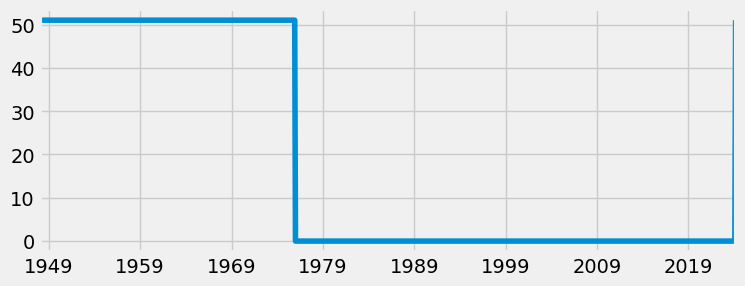

In [18]:
unemp_states.isna().sum(axis=1).plot(figsize=(8,3));

In [19]:
unemp_states.dropna(inplace=True)

In [33]:
fig = px.line(unemp_states, height=600, width=1500)
fig.update_layout(title_text='Unemployment Rates in the US (1976 to 2024)', title_x=0.5, 
                  title_font=dict(size=25, color='black'))

- ### 1.2.3 Pull April 2020 Unemployment Rate Per State

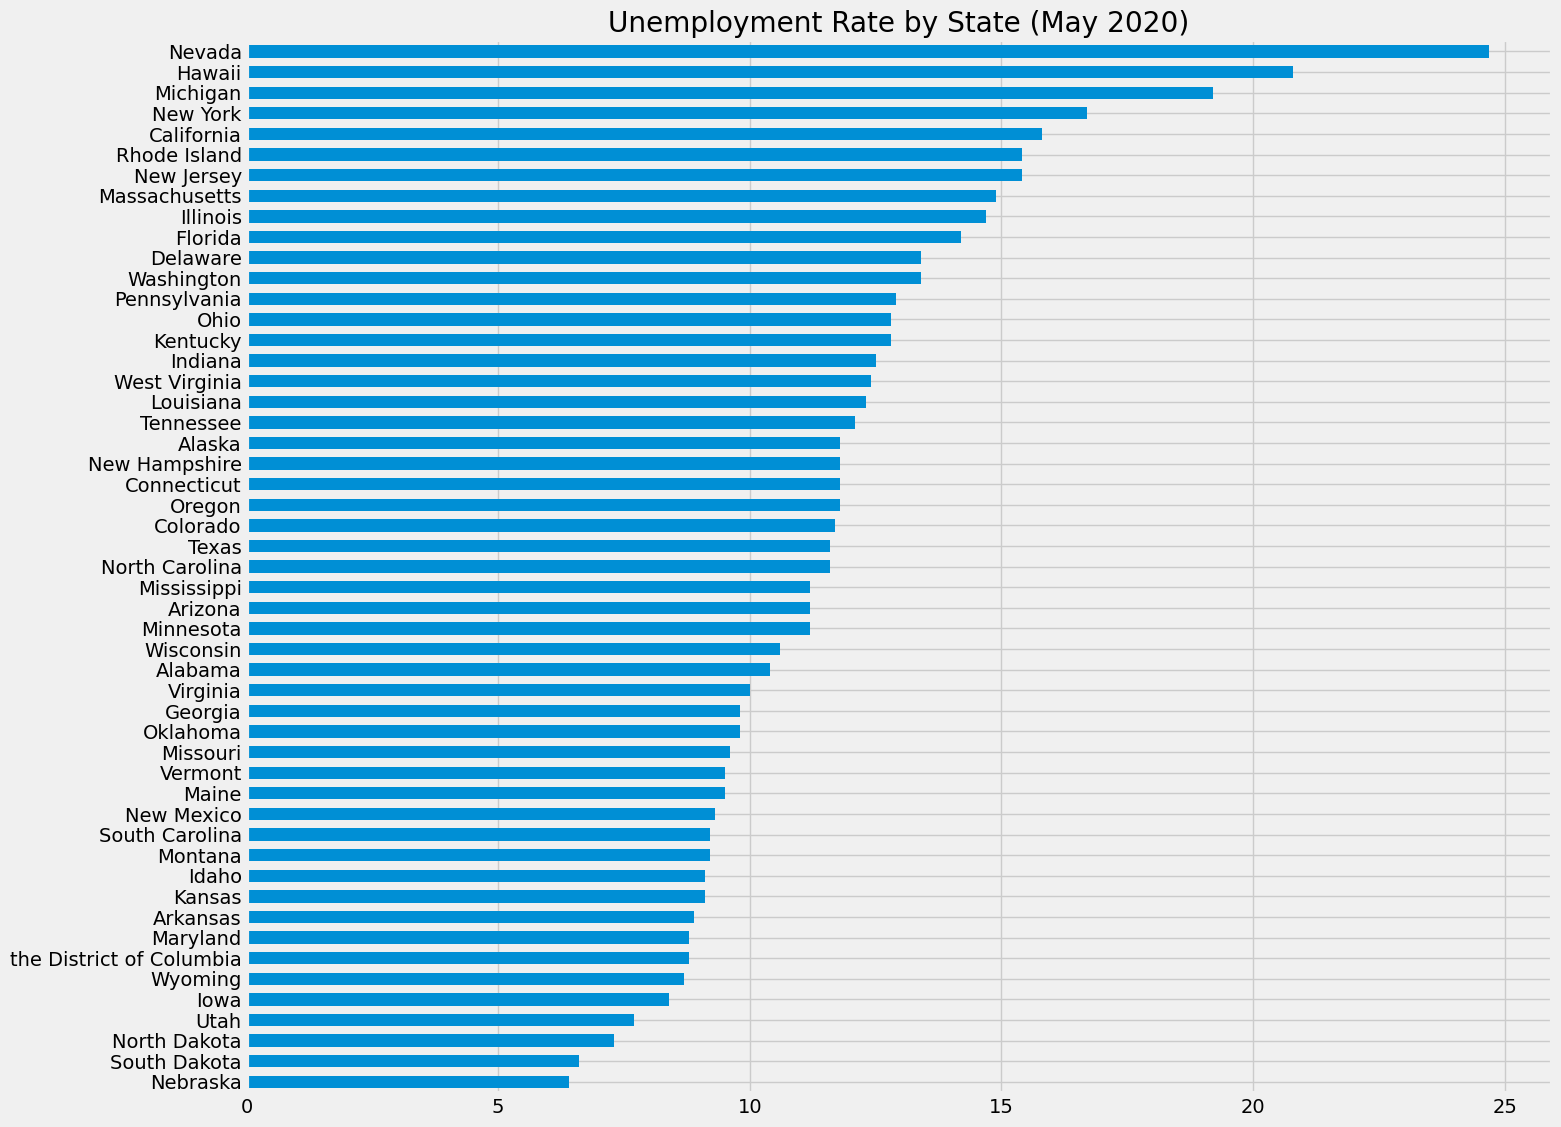

In [35]:
ax =  unemp_states.loc[unemp_states.index == '2020-05-01'].T \
      .sort_values('2020-05-01') \
      .plot(kind='barh', figsize=(15,13),
            width=.6,
            title='Unemployment Rate by State (May 2020)');
        
ax.legend().remove()
plt.show()

- ## 1.3 Pull Partipication Rate

In [36]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query("seasonal_adjustment == 'Seasonally Adjusted' & units == 'Percent'")
part_df = part_df.loc[part_df['id'].str.len() <= 7]

In [37]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

part_results = []

for myid in part_df.index:
    p_results = fred.get_series(myid)
    p_results = p_results.to_frame(name=myid)
    part_results.append(p_results)
    
part_states = pd.concat(part_results, axis=1)
part_states.columns = [part_id_to_state[x] for x in part_states.columns]

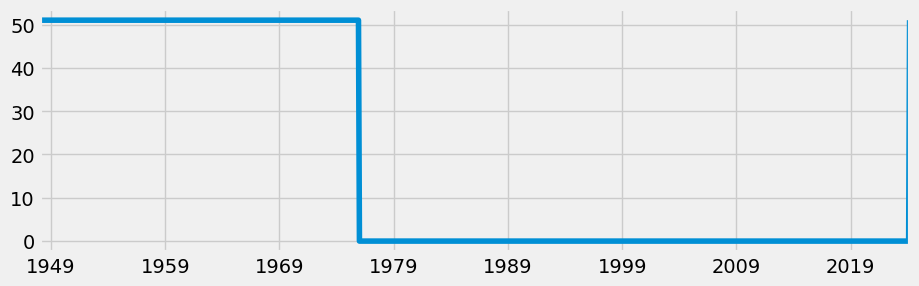

In [38]:
part_states.isna().sum(axis=1).plot(figsize=(10,3));

In [39]:
part_states.drop('Labor Force Participation Rate', axis=1, inplace=True)
part_states.dropna(inplace=True)

# 2. Plot Unemployment vs Participation

In [40]:
unemp_states = unemp_states.rename(columns={'the District of Columbia' : 'District of Columbia'})
part_states = part_states.rename(columns={'District Of Columbia' : 'District of Columbia'})

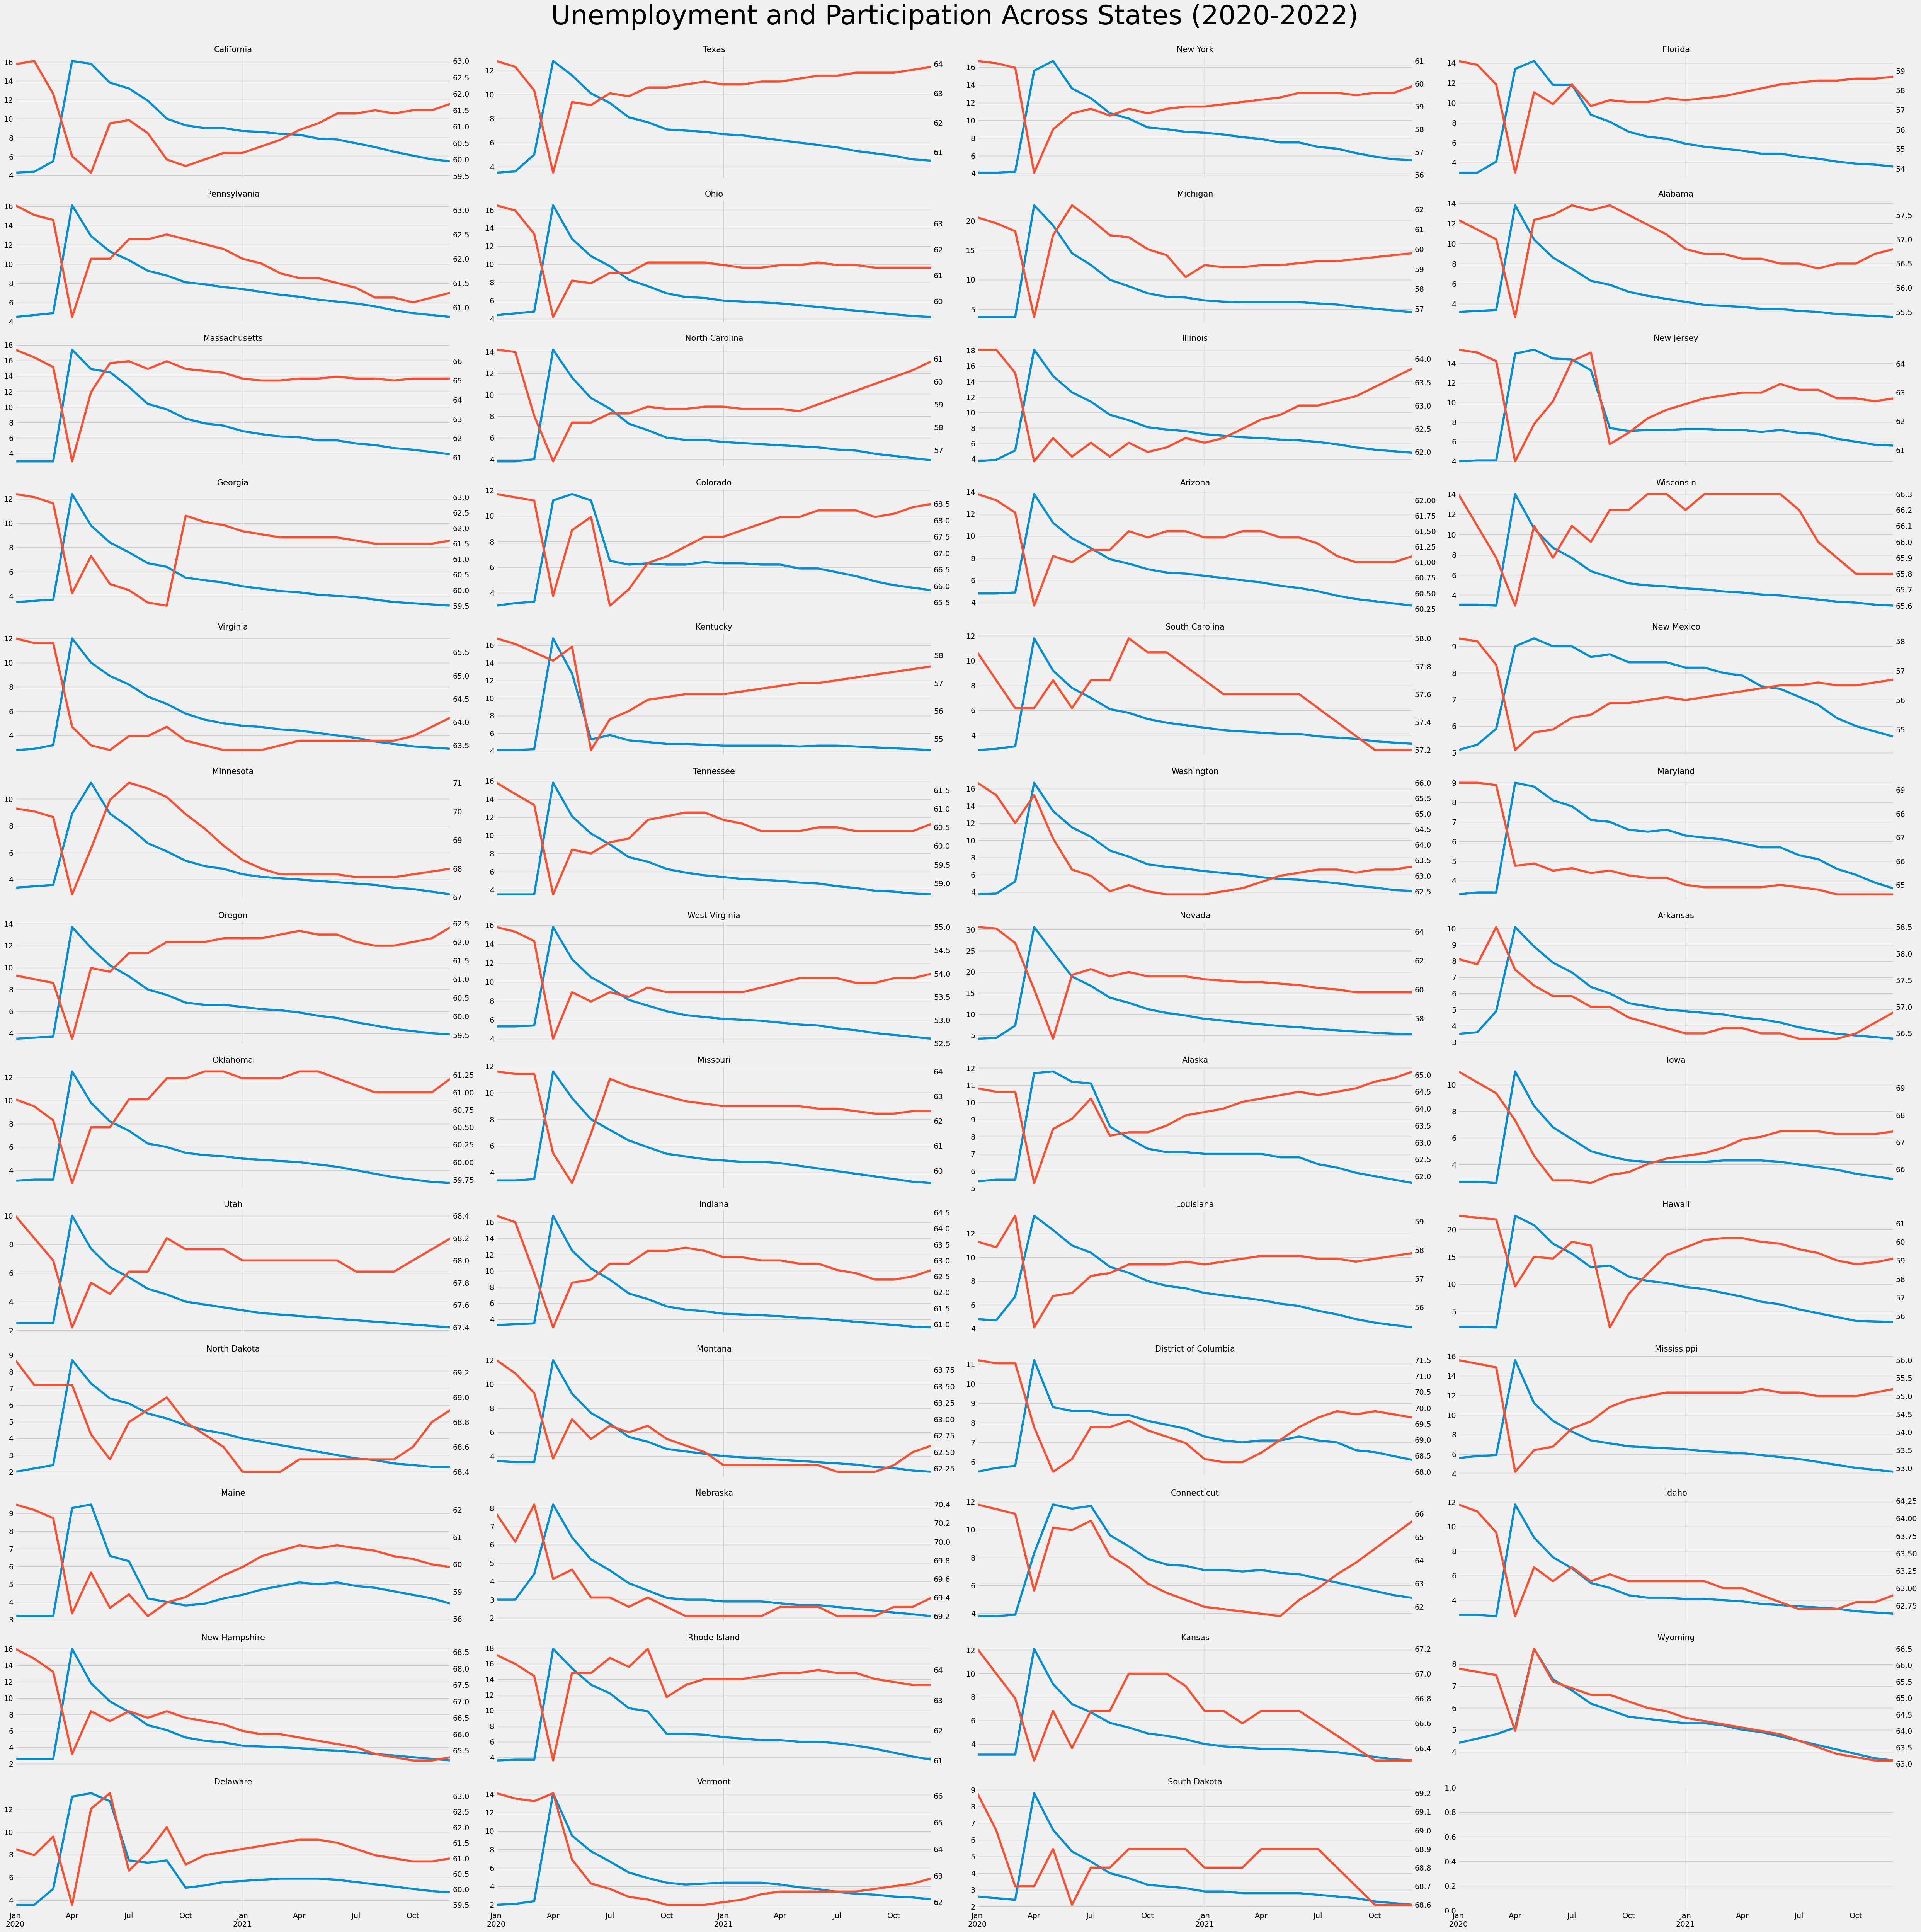

In [50]:
fig, axs = plt.subplots(13,4, figsize=(50,50), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment');
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1]);
    ax2.grid(False)
    axs[i].set_title(state, fontsize=15);
    i += 1
    
plt.suptitle('Unemployment and Participation Across States (2020-2022)', fontsize=50, y=1)
plt.tight_layout()
plt.show()